In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### NOTE
K değerini grafikte dirsek gibi kırılım yapan noktayı seçerek buluruz.

# 1-Create Dataset

Verisetini kendimiz oluşturacağımız için k sayısını ve haliyle sınıf sayısını 3 olara belirledik.

- normal=gaussian.normal(25, 5, 1000) 

- 25 ortalamaya sahip, 5 sigmaya sahip(20 ile 30 arasında değerler olacak), 1000 tane rasgele veri üret.


In [2]:
# class1 2 feature
x1 = np.random.normal(25, 5, 1000)
y1 = np.random.normal(25, 5, 1000)

# class2
x2 = np.random.normal(55, 5, 1000)
y2 = np.random.normal(60, 5, 1000)

# class3
x3 = np.random.normal(55, 5, 1000)
y3 = np.random.normal(15, 5, 1000)

In [3]:
x = np.concatenate((x1, x2, x3), axis = 0) #yukarıdan aşağı merge et. 
y = np.concatenate((y1, y2, y3), axis = 0)

dictionary = {"x":x, "y":y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,26.979177,22.813643
1,26.209134,25.437185
2,14.312550,28.605163
3,28.537617,33.064576
4,34.127766,17.030072


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [5]:
data.describe()

,x,y
count,3000.000000,3000.000000
mean,44.959997,33.347806
std,15.083889,19.915589
min,10.367284,-1.827699
25%,28.222983,17.518722
50%,51.704189,25.458210
75%,56.673443,56.406505
max,73.951316,77.851935


# 2- Visualize Data

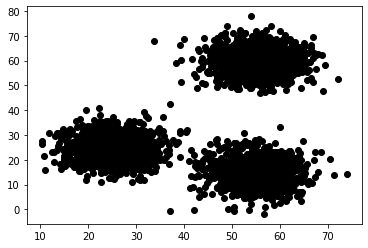

In [6]:
plt.scatter(x1, y1, color = "black")
plt.scatter(x2, y2, color = "black")
plt.scatter(x3, y3, color = "black")
plt.show() # datamıza bunu öğreteceğiz.

# 3-Create K-Means Model
Within-Cluster-Sum-of-Squares (WCSS)

In [7]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data) #create kmeans model
    wcss.append(kmeans.inertia_) # find wcss value for every k value. 
print(wcss)

[1871838.9823753939, 661302.6228153039, 155633.53517895928, 137975.51030000256, 121364.91369509298, 104715.62169838743, 93536.37525801238, 82186.4603297103, 71022.80336640224, 65823.94140357261, 60829.612023198235, 55779.19073698761, 52576.11587245015, 49990.17130522576]


# 4- Find K Value

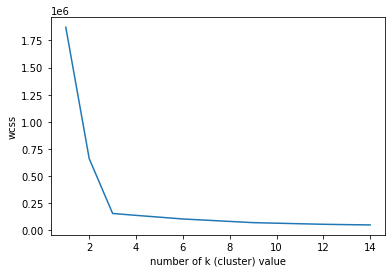

In [8]:
plt.plot(range(1,15), wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show() # k değeri 3 de optimum bir dirsek gibi kırılım var.

# 5-Rebuild Model for K=3

In [9]:
kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data) # fit et ve kümelerini ayır.
data["label"] = clusters # data'ya label adında bir sütun oluştururuz.
data.head(5)

,x,y,label
0,26.979177,22.813643,0
1,26.209134,25.437185,0
2,14.312550,28.605163,0
3,28.537617,33.064576,0
4,34.127766,17.030072,0


In [10]:
data.tail(5)

,x,y,label
2995,53.328811,14.205073,2
2996,64.071332,6.921721,2
2997,55.642588,10.657158,2
2998,63.364996,12.704828,2
2999,54.925211,10.110046,2


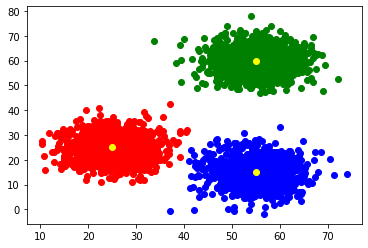

In [11]:
plt.scatter(data.x[data.label == 0 ], data.y[data.label == 0], color = "red")
plt.scatter(data.x[data.label == 1 ], data.y[data.label == 1], color = "green")
plt.scatter(data.x[data.label == 2 ], data.y[data.label == 2], color = "blue")
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], color = "yellow") # show centroit
plt.show()